In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.3/38.8 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.5/38.8 MB 3.7 MB/s eta 0:00:11
    --------------------------------------- 0.8/38.8 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.0/38.8 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.2/38.8 MB 4.2 MB/s eta 0:00:10
   - -------------------------------------- 1.5/38.8 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.8/38.8 MB 4.5 MB/s eta 0:00:09
   -- ------------------------------------- 2.0/38.8 MB 4.5 MB/s eta 0:00:09
   -- ------------------------------------- 2.2/38.8 MB 4.6 MB/s eta 0:00:09
   -- ------------------------------------- 2.4/38.8 MB 4.5 MB/s eta 0:00:09
   -- -------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import pathlib
data_dir = pathlib.Path('./flower_photos')

In [3]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [5]:
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:4]

[WindowsPath('flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('flower_photos/roses/10894627425_ec76bbc757_n.jpg')]

In [7]:
from PIL import Image

In [8]:
str(roses[3])

'flower_photos\\roses\\10894627425_ec76bbc757_n.jpg'

In [9]:
# for i in range(1,6):
#     img = Image.open(str(roses[i]))
#     img.show()

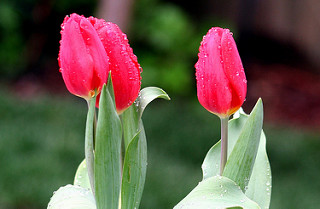

In [10]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [22]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [13]:
flowers_images_dict['roses'][:5]

[WindowsPath('flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
str(flowers_images_dict['roses'][0])

'flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 179, 3)

In [19]:
flowers_images_dict

{'roses': [WindowsPath('flower_photos/roses/10090824183_d02c613f10_m.jpg'),
  WindowsPath('flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
  WindowsPath('flower_photos/roses/10503217854_e66a804309.jpg'),
  WindowsPath('flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
  WindowsPath('flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
  WindowsPath('flower_photos/roses/11102341464_508d558dfc_n.jpg'),
  WindowsPath('flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
  WindowsPath('flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
  WindowsPath('flower_photos/roses/118974357_0faa23cce9_n.jpg'),
  WindowsPath('flower_photos/roses/11944957684_2cc806276e.jpg'),
  WindowsPath('flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
  WindowsPath('flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
  WindowsPath('flower_photos/roses/12202373204_34fb07205b.jpg'),
  WindowsPath('flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
  WindowsPath('flower_photos/roses/12240165555_98625b1e88_n.jpg')

In [18]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [29]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [23]:
x , y = [], []
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [25]:
X = np.array(x)
y = np.array(y)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [31]:
model.fit(X_train_scaled, y_train, epochs=30)